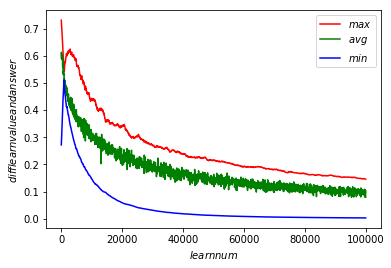

In [36]:
import numpy as np
% matplotlib inline
from matplotlib import pyplot as plt

# input num
input_num = 2
# learn loop num
loop = 100000
# result output interval
interval = 50

class Neuron():
    def __init__(self, n):
        # Learning rate
        self._rate = 0.01
        # weight to input values default
        self._weight = np.array(np.round(np.random.rand(n)))
        # bias value
        self._bias = 1.0
        # output value
        self._y = None

    def learn(self, x):
        """Learning
        return: Difference between output value and correct answer value after learning
        """
        # Get input value of correct answer derived from input value
        t = self._get_correct(x)
        # Calculate the state of neuron by input values(x) and weight(_weight) and(_bias)
        s = self._weight.dot(x) + self._bias
        # Calculate the output value by the state of neuron(0~1)
        self._y = 1 / (1 + np.exp(-s))

        # differential　the state of neuron
        diff_y = self._y - t
        # differential　output value
        diff_state = self._y * (1 - self._y)
        #　common differential　 calculation
        diff_common = diff_y * diff_state
        # learning weight
        self._weight -= self._rate * diff_common * x
        # learning bias
        self._bias -= self._rate * diff_common

        # Difference between output value and correct answer value after learning
        return np.sqrt(np.power(self._y - t, 2))

    def _get_correct(self, x):
        """Get input value of correct answer derived from input value
        """
        return 0 if (x[x == 0.0].size) else 1

if __name__ == '__main__':
    n = Neuron(input_num)

    # graph x
    output_x = []
    # graph y
    tmp_y = []
    output_y_max = []
    output_y_avg = []
    output_y_min = []

    for i in range(1, loop+1):
        # input from random　combination　(0,0 or 0,1 or 1,0 or 1,1)
        x = np.array(np.round(np.random.rand(neuron_num)))
        diff = n.learn(x)
        tmp_y.append(diff)
        if i % interval == 0:
            # Average, max, min value for each set number of loops
            output_y_max.append(max(tmp_y))
            output_y_avg.append(sum(tmp_y) / len(tmp_y))
            output_y_min.append(min(tmp_y))
            tmp_y = []
            output_x.append(i)

    # output
    line_max, line_avg, line_min = plt.plot(
        output_x, output_y_max, 'r-', 
        output_x, output_y_avg, 'g-', 
        output_x, output_y_min, 'b-'
    )
    plt.legend((line_max, line_avg, line_min), ('$max$', '$avg$', '$min$'))
    plt.xlabel('$learn num$')
    plt.ylabel('$diff learn value and answer$')
    plt.show()